In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows의 경우

font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [37]:
# 데이터 불러오기 
raw_data = pd.read_excel('./DB/3_구조 생산설계 DP 현황.xlsx', sheet_name = None)

# 엑셀의 sheet 값 추출
P1 = raw_data['P1_COT 구조생설DP']
P2 = raw_data['P2_STL 구조생설DP']
P3 = raw_data['P3_CNT 구조생설DP']

# 필요없는 열 ['No', 'D/P&BOM 코드'] 삭제
P1 = P1.drop(['No', 'D/P&BOM 코드'], axis = 1)
P2 = P2.drop(['No', 'D/P&BOM 코드'], axis = 1)
P3 = P3.drop(['No', 'D/P&BOM 코드'], axis = 1)

In [38]:
P1.head()

,프로젝트,D/P&BOM 내역,설계기능,도면종류,협력사,직영책임부서,작업 출도계획,작업 출도실적
0,P1,도장,F1,D1,NaN,D1,2014-07-13,2014-07-10
1,P1,도장,F1,D1,NaN,D1,2014-07-13,2014-07-10
2,P1,가공,F2,D2,D5,D3,2014-07-14,2014-07-09
3,P1,족장,F3,D3,NaN,D4,2014-07-21,2014-06-30
4,P1,공작,F2,D4,D5,D3,2014-07-21,2014-06-16


In [39]:
P2.head()

,프로젝트,D/P&BOM 내역,설계기능,도면종류,협력사,직영책임부서,작업 출도계획,작업 출도실적
0,P2,도장,F1,D1,NaN,D1,2014-06-15,2014-04-21
1,P2,도장,F1,D1,NaN,D1,2014-05-28,2014-03-31
2,P2,가공,F2,D2,D6,D3,2014-03-24,2014-03-16
3,P2,족장,F3,D3,NaN,D4,2014-03-19,2014-03-16
4,P2,재마킹,F4,D6,NaN,D3,2014-03-19,2014-03-04


In [40]:
P3.head()

,프로젝트,D/P&BOM 내역,설계기능,도면종류,협력사,직영책임부서,작업 출도계획,작업 출도실적
0,P3,족장,F3,D3,NaN,D4,2014-09-21,2014-10-12
1,P3,족장,F3,D3,NaN,D4,2014-07-30,2014-10-12
2,P3,족장,F3,D3,NaN,D4,2014-08-20,2014-10-12
3,P3,족장,F3,D3,NaN,D4,2014-09-04,2014-10-12
4,P3,족장,F3,D3,NaN,D4,2014-09-11,2014-10-12


In [41]:
project = [P1, P2, P3]

# ['작업 출도계획', '작업 출도실적']을 날짜 형식으로 변환
for i in range(len(project)):
    project[i]['작업 출도계획'] = pd.to_datetime(project[i]['작업 출도계획'])
    project[i]['작업 출도실적'] = pd.to_datetime(project[i]['작업 출도실적'])

    # 계획보다 늦게 제출 됐으면 1 제대로 제출 됐으면 0의 값 부여
    project[i]['출도계획 차질 유무'] = (project[i]['작업 출도계획'] < project[i]['작업 출도실적']).astype(int)
    # 계획보다 늦게 제출된 날짜를 계산
    project[i]['출도계획 차질 날짜'] = (project[i]['작업 출도실적'] - project[i]['작업 출도계획']).dt.days

    # clip(lower || upper) = 주어진 최솟값과 최댓값을 기준으로 데이터의 값을 조정해, 범위를 벗어나는 값은 해당 범위의 경계 값으로 변경
    project[i]['출도계획 차질 날짜'] = project[i]['출도계획 차질 날짜'].clip(lower = 0)

In [42]:
P1.head()

,프로젝트,D/P&BOM 내역,설계기능,도면종류,협력사,직영책임부서,작업 출도계획,작업 출도실적,출도계획 차질 유무,출도계획 차질 날짜
0,P1,도장,F1,D1,NaN,D1,2014-07-13,2014-07-10,0,0
1,P1,도장,F1,D1,NaN,D1,2014-07-13,2014-07-10,0,0
2,P1,가공,F2,D2,D5,D3,2014-07-14,2014-07-09,0,0
3,P1,족장,F3,D3,NaN,D4,2014-07-21,2014-06-30,0,0
4,P1,공작,F2,D4,D5,D3,2014-07-21,2014-06-16,0,0


In [43]:
P2.head()

,프로젝트,D/P&BOM 내역,설계기능,도면종류,협력사,직영책임부서,작업 출도계획,작업 출도실적,출도계획 차질 유무,출도계획 차질 날짜
0,P2,도장,F1,D1,NaN,D1,2014-06-15,2014-04-21,0,0
1,P2,도장,F1,D1,NaN,D1,2014-05-28,2014-03-31,0,0
2,P2,가공,F2,D2,D6,D3,2014-03-24,2014-03-16,0,0
3,P2,족장,F3,D3,NaN,D4,2014-03-19,2014-03-16,0,0
4,P2,재마킹,F4,D6,NaN,D3,2014-03-19,2014-03-04,0,0


In [44]:
P3.head()

,프로젝트,D/P&BOM 내역,설계기능,도면종류,협력사,직영책임부서,작업 출도계획,작업 출도실적,출도계획 차질 유무,출도계획 차질 날짜
0,P3,족장,F3,D3,NaN,D4,2014-09-21,2014-10-12,1,21
1,P3,족장,F3,D3,NaN,D4,2014-07-30,2014-10-12,1,74
2,P3,족장,F3,D3,NaN,D4,2014-08-20,2014-10-12,1,53
3,P3,족장,F3,D3,NaN,D4,2014-09-04,2014-10-12,1,38
4,P3,족장,F3,D3,NaN,D4,2014-09-11,2014-10-12,1,31


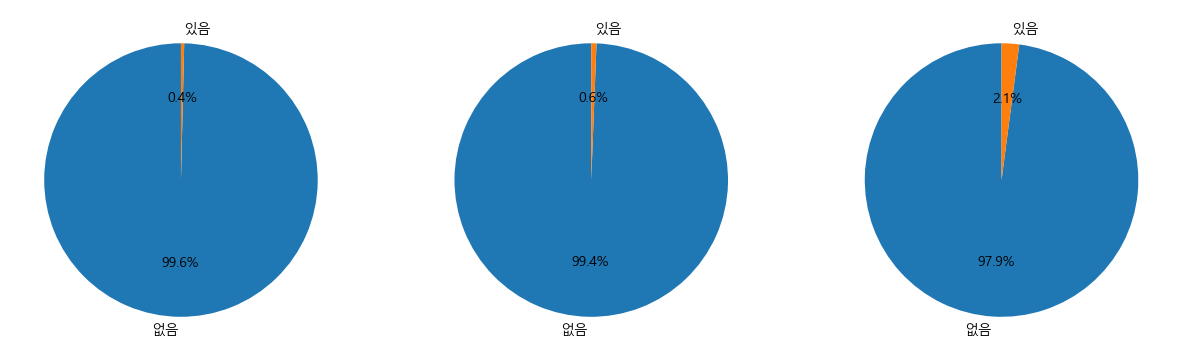

In [45]:
# 각 프로젝트 별 출도계획 차질 비율

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(project)):
    axs[i].pie(project[i]['출도계획 차질 유무'].value_counts(), labels = ['없음', '있음'], autopct = '%1.1f%%', startangle = 90)

In [47]:
# 출도계획에 차질이 없는 데이터만 추출
P1_not_broken = P1[P1['출도계획 차질 유무'] == 0]
P2_not_broken = P2[P2['출도계획 차질 유무'] == 0]
P3_not_broken = P3[P3['출도계획 차질 유무'] == 0]

# 출도계획에 차질이 있는 데이터만 추출
P1_broken = P1[P1['출도계획 차질 유무'] == 1]
P2_broken = P2[P2['출도계획 차질 유무'] == 1]
P3_broken = P3[P3['출도계획 차질 유무'] == 1]

# 각 프로젝트 별 갯수 확인
print('P1: {}, P2: {}, P3: {}'.format(len(P1_broken), len(P2_broken), len(P3_broken)))

P1: 3, P2: 6, P3: 27


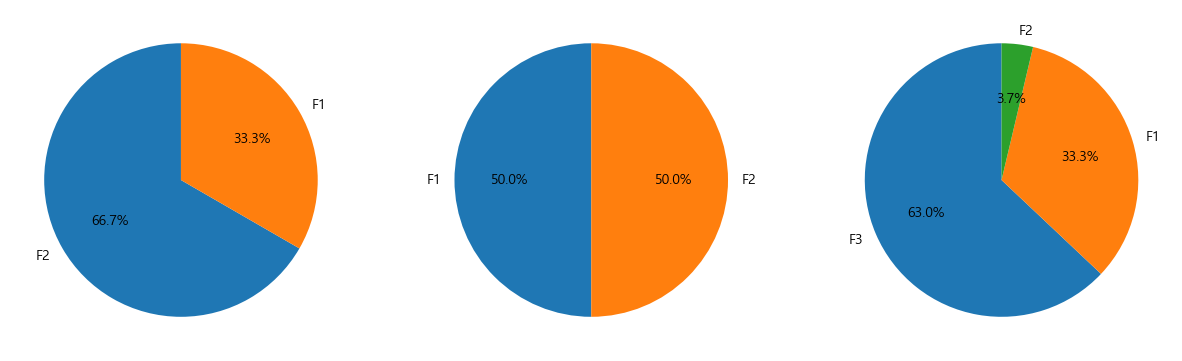

In [14]:
# 각 프로젝트 별 설계기능 비율
project = [P1, P2, P3]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(project)):
    axs[i].pie(project[i]['설계기능'].value_counts(), labels = project[i]['설계기능'].value_counts().index, autopct = '%1.1f%%', startangle = 90)

,프로젝트,D/P&BOM 내역,설계기능,도면종류,협력사,직영책임부서,작업 출도계획,작업 출도실적,출도계획 차질 유무,출도계획 차질 날짜
474,P1,의장,F1,D8,NaN,D1,2014-05-26,2014-05-28,1,2
500,P1,철의장,F2,D5,D5,D3,2012-11-06,2012-12-31,1,55
502,P1,철의장,F2,D5,D5,D3,2012-11-06,2012-12-31,1,55
